<a href="https://colab.research.google.com/github/santhoshi-h/datasets/blob/main/house_price_prediction_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset to inspect the contents
url=("https://raw.githubusercontent.com/santhoshi-h/datasets/refs/heads/main/train.csv")
df = pd.read_csv(url)

# Display the first few rows and column information to understand the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

(None,
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  

In [ ]:
# Step 1: Data Overview

# Summary of the dataset
print(df.info())  # Basic info about data types and non-null counts

# Descriptive statistics of numerical features
print(df.describe())

# Checking for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])  # Print only columns with missing data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

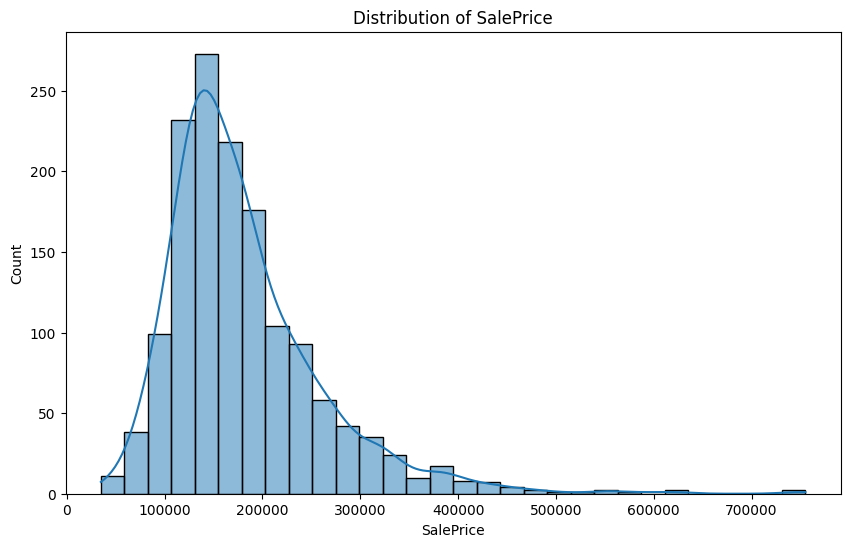

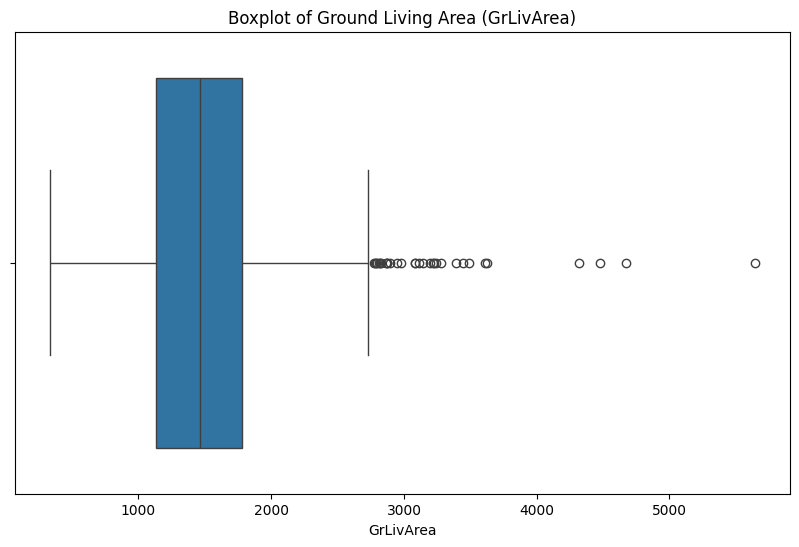

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of SalePrice (target variable)
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.show()

# Boxplot for detecting outliers in Ground Living Area (GrLivArea)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GrLivArea'])
plt.title('Boxplot of Ground Living Area (GrLivArea)')
plt.show()


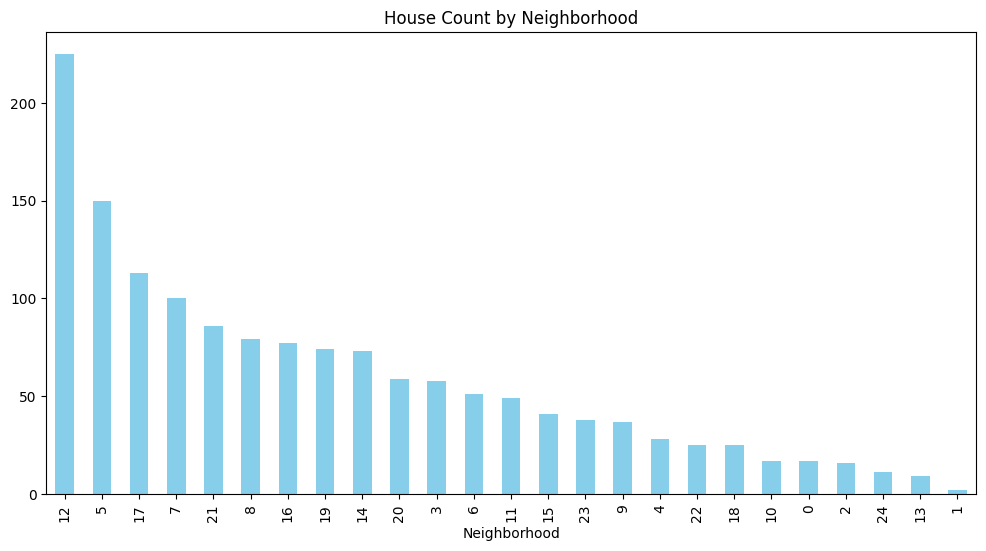

In [ ]:
# Bar plot for categorical feature 'Neighborhood'
plt.figure(figsize=(12, 6))
df['Neighborhood'].value_counts().plot(kind='bar', color='skyblue')
plt.title('House Count by Neighborhood')
plt.show()


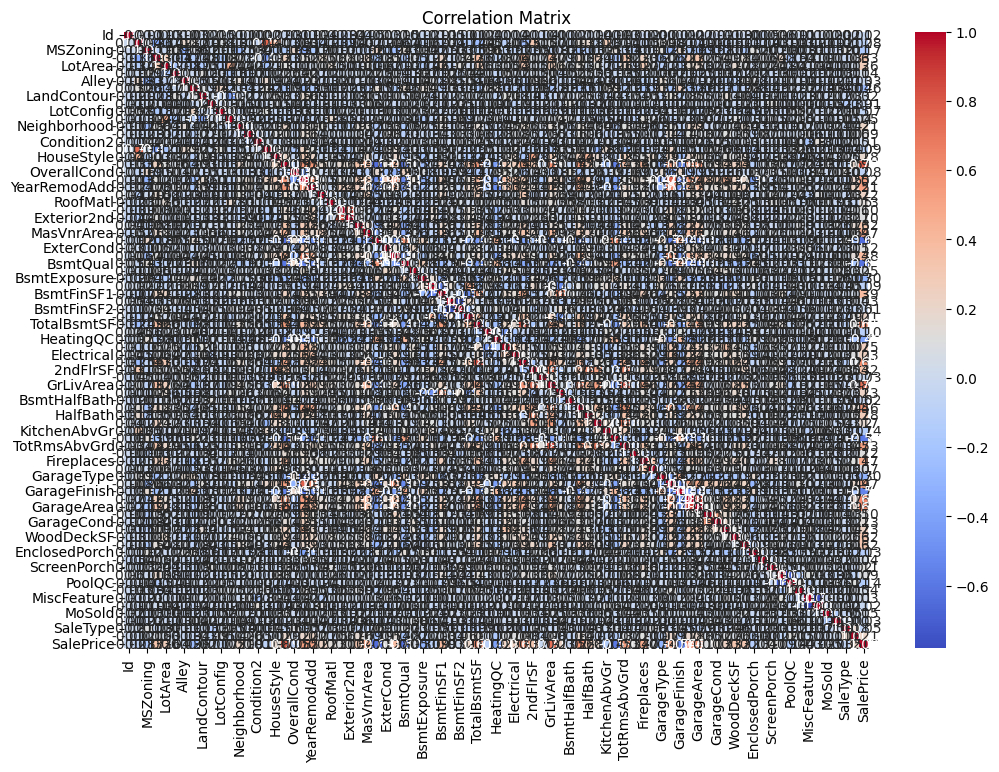

In [ ]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


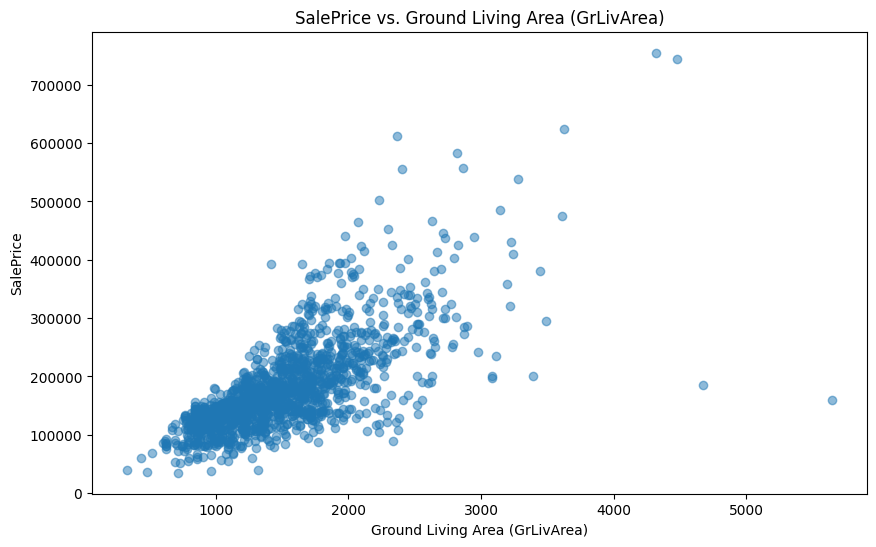

In [ ]:
# Scatter plot between SalePrice and Ground Living Area (GrLivArea)
plt.figure(figsize=(10, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
plt.title('SalePrice vs. Ground Living Area (GrLivArea)')
plt.xlabel('Ground Living Area (GrLivArea)')
plt.ylabel('SalePrice')
plt.show()


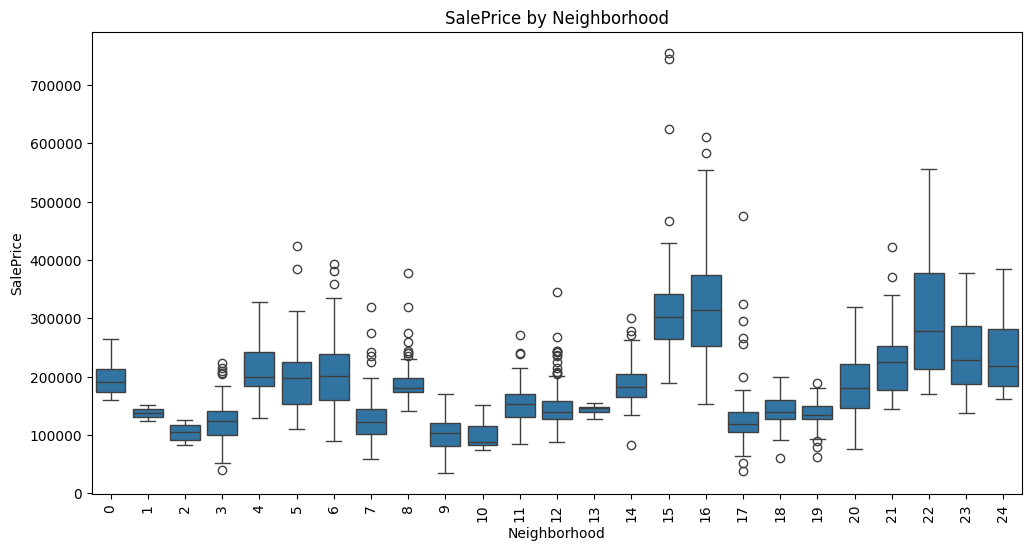

In [ ]:
# Boxplot to analyze how SalePrice varies by Neighborhood
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('SalePrice by Neighborhood')
plt.show()


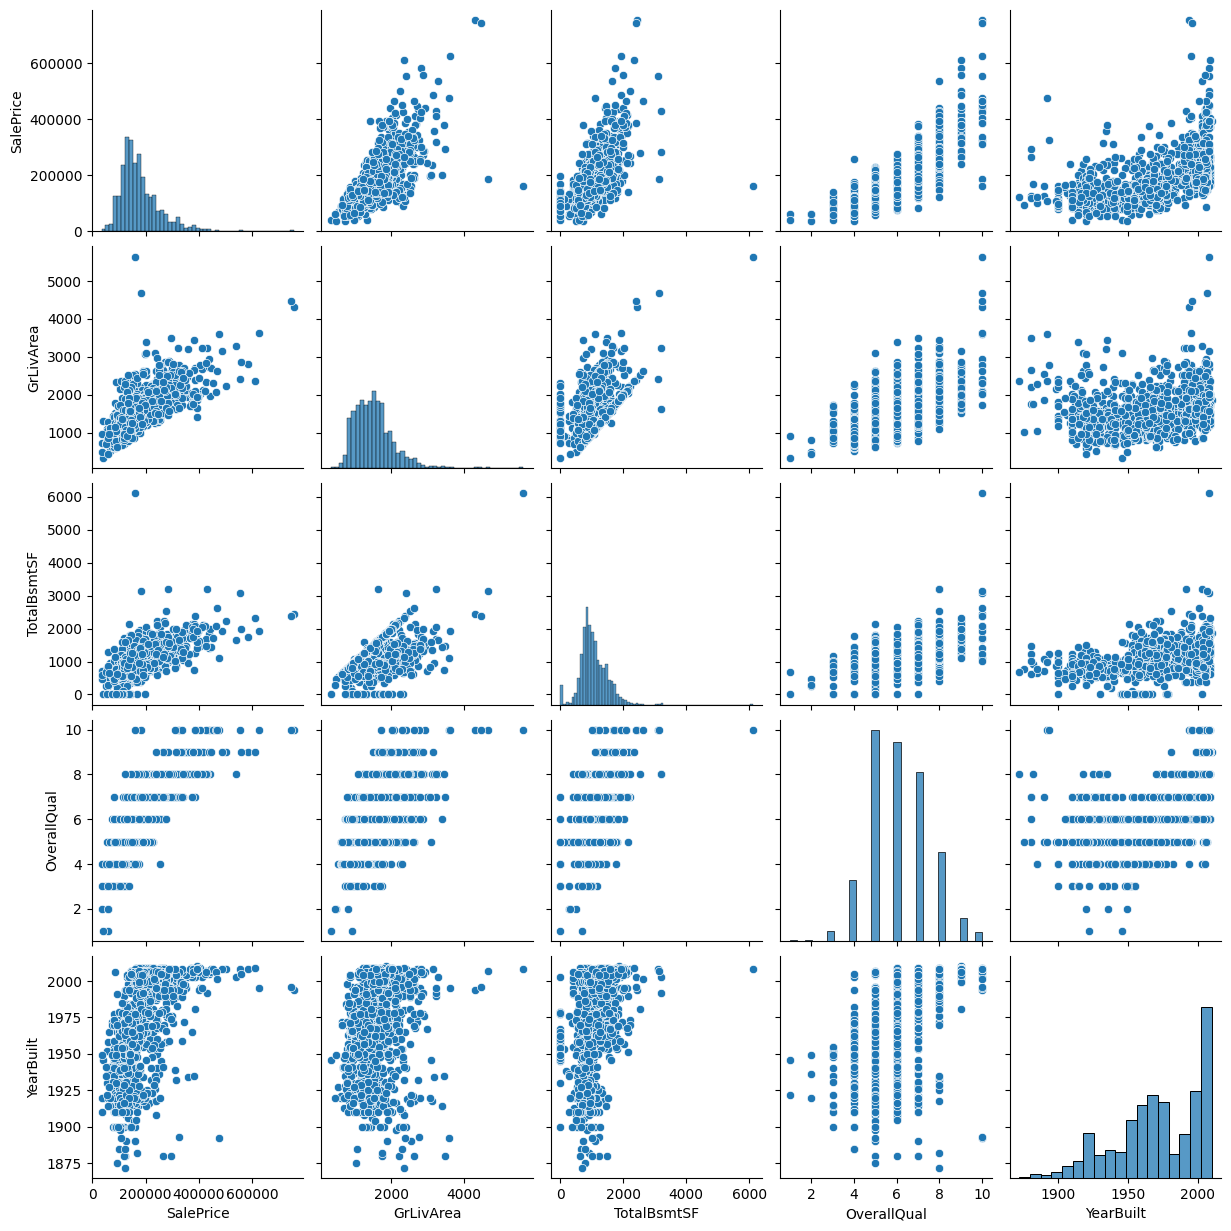

In [ ]:
# Pairplot of some important numerical features
sns.pairplot(df[['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'OverallQual', 'YearBuilt']])
plt.show()


In [ ]:
# Creating new features based on existing ones
df['HouseAge'] = 2024 - df['YearBuilt']  # Example of creating a new feature for house age
df['TotalBathrooms'] = df['FullBath'] + df['HalfBath'] * 0.5

# Drop irrelevant or redundant features
df = df.drop(columns=['MiscFeature', 'Alley', 'PoolQC'])  # Example of dropping features


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Handle missing values by filling with median for numerical features and mode for categorical features
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# Encode categorical variables using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Select features (dropping 'Id' and 'SalePrice')
X = df.drop(columns=['Id', 'SalePrice'])
y = df['SalePrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse


24714.632006583248

In [ ]:
# Further reduce the number of estimators and select fewer features for quicker training
# We will choose a subset of the most important features for house price prediction

# Select a smaller subset of relevant features for demonstration
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

X_reduced = df[selected_features]

# Split the data again with fewer features
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Reduce the number of estimators further for faster training
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=25)

# Train the model
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse


41925.01925206881

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 28762.739749267832


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive
